# EO

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [29]:
# load npy combined_stft_features_19_final.npy
dir = "E:/ChristianMusaeus/Data/Turkish/"
stft_data = np.load(f"{dir}combined_stft_features_19_final.npy")
print(stft_data.shape)
stft_data = stft_data[:,:-1]
normal_data = np.load(f"{dir}dataframe.npy")
print(f"normal_data.shape before: {normal_data.shape}")

# keep these channels only, these are the indexes: 
""" 
Fp1 -> 0
Fp2 -> 33
F3  -> 4
F4  -> 38
C3  -> 12
C4  -> 48
P3  -> 20
P4  -> 55
O1  -> 26
O2  -> 61
F7  -> 6
F8  -> 40
T7  -> 14
T8  -> 50
P7  -> 22
P8  -> 57
Fz  -> 36
Cz  -> 46
Pz  -> 30 

but add 1 to each index, since the first channel is channel_1
"""
df = pd.DataFrame(normal_data)
df = df[[0, 33, 4, 38, 12, 48, 20, 55, 26, 61, 6, 40, 14, 50, 22, 57, 36, 46, 30]]
turkish_raw = df 
print(turkish_raw.shape)


(2980, 6176)
normal_data.shape before: (762880, 65)
(762880, 19)


# Prepare raw data to be scaled and plotted

In [30]:
# Chop data up into 1 second windows, i.e 256 samples and 19 channels. Make dataframe from this where each row is a a second of data
# Prepare to create the DataFrame
rows = []

# Loop through the number of segments in X
num_segments = 2980
num_features = 19*256  # 19 channels * 256 samples
# Step 1: Pre-allocate the array for the final data
# Each row will have num_features features
flattened_data = np.zeros((num_segments, num_features))

# Step 2: Extract and flatten segments
for i in range(num_segments):
    if i % 100 == 0: 
        print(f"progress: {i}/{num_segments}")
    # Extract the current block of 256 data points across 19 channels
    segment_features = df.T.iloc[:, i * 256:(i * 256 + 256)].values
    
    # Flatten the block to 1D and place it in the corresponding row
    flattened_data[i, :] = segment_features.flatten()

# Step 3: Create the DataFrame using the flattened data
# Create the DataFrame directly from the pre-allocated NumPy array
data_raw = pd.DataFrame(flattened_data)


# Normalize the data per patient
patient_ids = np.repeat([1,2,3,4,5,6,7,8,9,10],298) 

# Normalize per patient (within training and test sets)
data_norm_raw = []
for patient_id in np.unique(patient_ids):
    patient_data = data_raw[patient_ids == patient_id]
    scaler = StandardScaler()   
    # scaler = MinMaxScaler(feature_range=(-1,1))

    patient_data_scaled = scaler.fit_transform(patient_data)
    data_norm_raw.append(patient_data_scaled)

data_norm_raw = np.concatenate(data_norm_raw, axis=0)
data_norm_raw = pd.DataFrame(data_norm_raw)
print(data_norm_raw.shape)

progress: 0/2980
progress: 100/2980
progress: 200/2980
progress: 300/2980
progress: 400/2980
progress: 500/2980
progress: 600/2980
progress: 700/2980
progress: 800/2980
progress: 900/2980
progress: 1000/2980
progress: 1100/2980
progress: 1200/2980
progress: 1300/2980
progress: 1400/2980
progress: 1500/2980
progress: 1600/2980
progress: 1700/2980
progress: 1800/2980
progress: 1900/2980
progress: 2000/2980
progress: 2100/2980
progress: 2200/2980
progress: 2300/2980
progress: 2400/2980
progress: 2500/2980
progress: 2600/2980
progress: 2700/2980
progress: 2800/2980
progress: 2900/2980
(2980, 4864)


In [31]:
# Normalize the data
data = pd.DataFrame(stft_data)

patient_ids = np.repeat([1,2,3,4,5,6,7,8,9,10],298) 

# Normalize per patient (within training and test sets)
data_norm = []
for patient_id in np.unique(patient_ids):
    patient_data = data[patient_ids == patient_id]
    scaler = StandardScaler()
    # scaler = MinMaxScaler(feature_range=(-1,1))

    patient_data_scaled = scaler.fit_transform(patient_data)
    data_norm.append(patient_data_scaled)

data_norm_stft = np.concatenate(data_norm, axis=0)
data_norm_stft = pd.DataFrame(data_norm_stft)
print(data_norm_stft.shape)

(2980, 6175)


# Turkish plotting
# Eyes Open

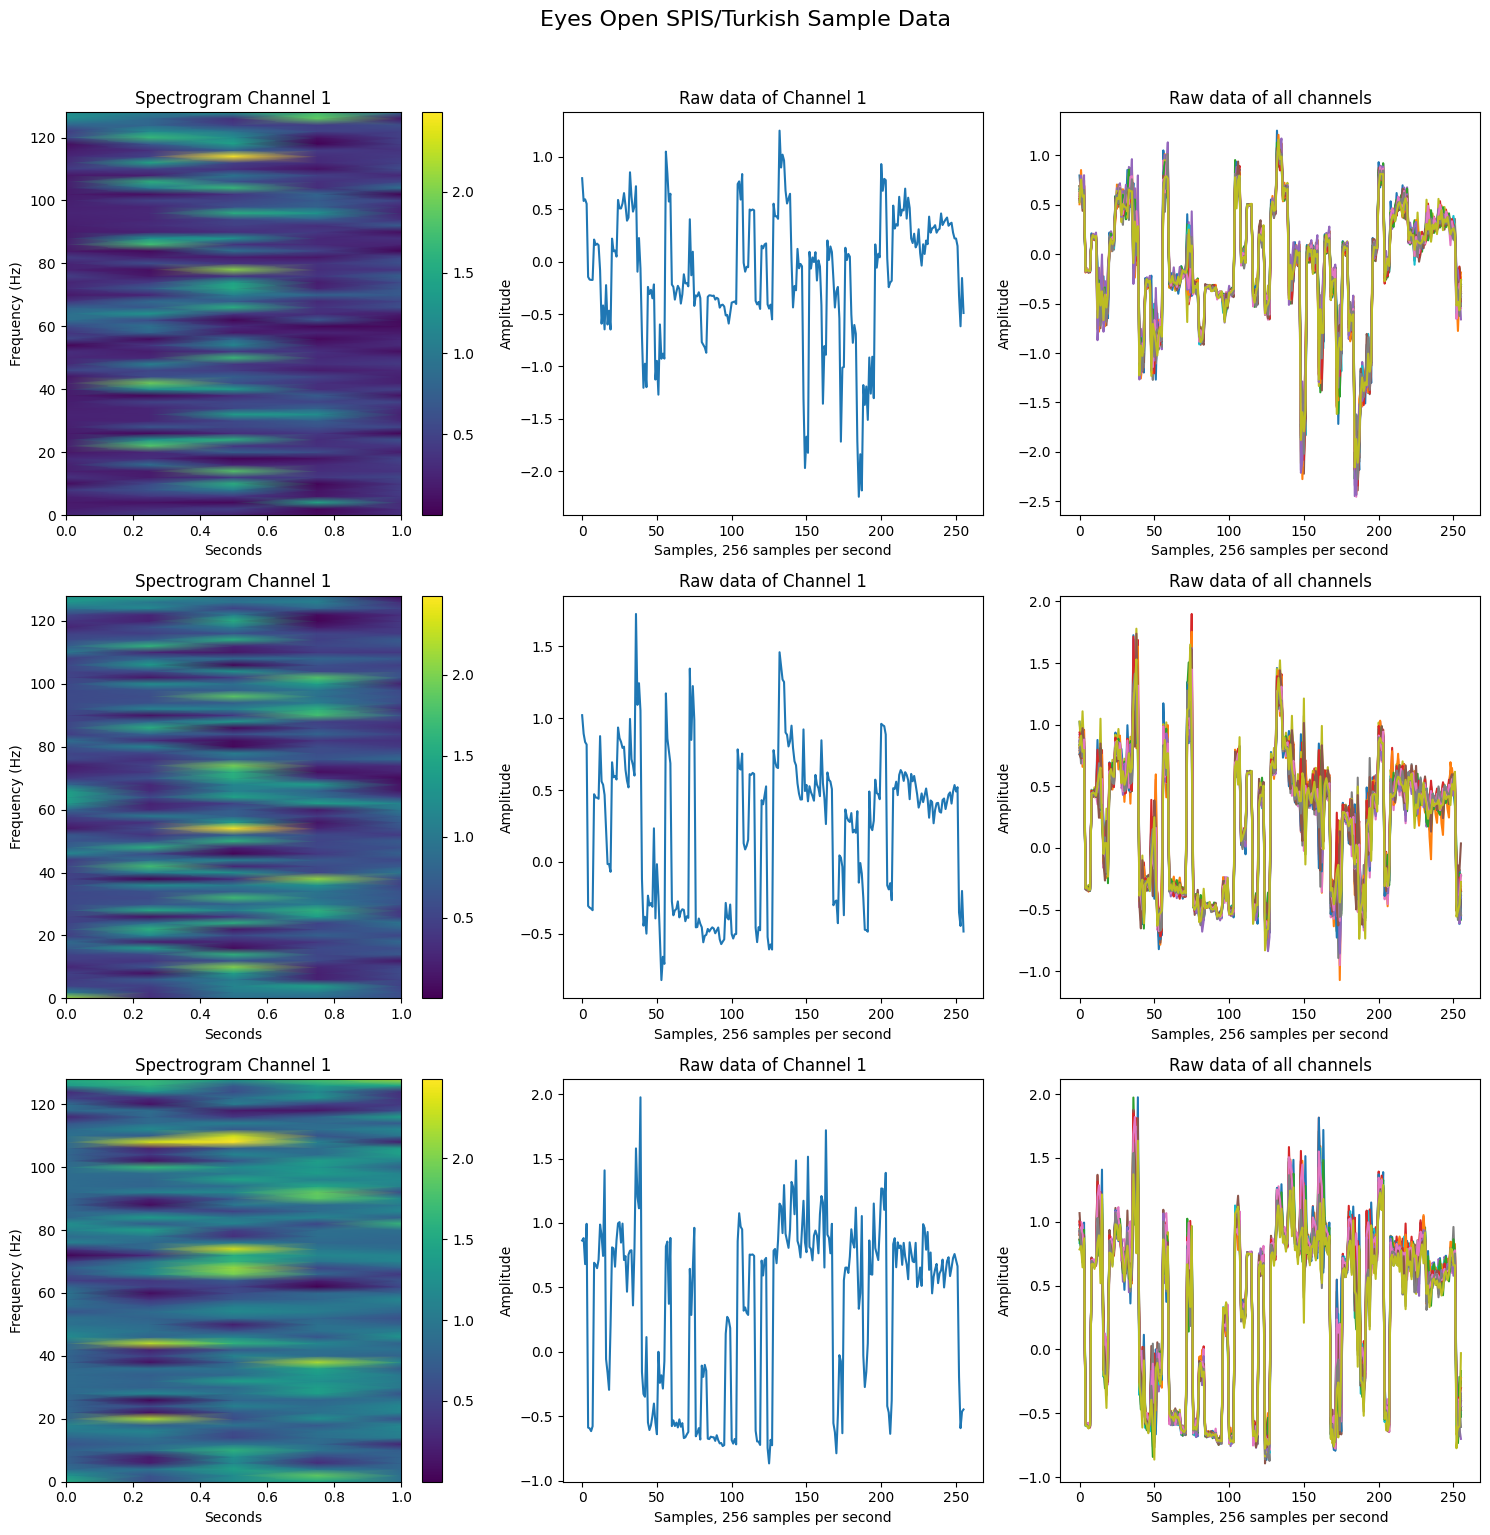

In [34]:
# make a 3x3 grid of subplots

second = 15

times = np.array([0,0.25,0.5,0.75,1])
frequencies = np.arange(0, 130, 2)
spectrogram0 = np.abs(data_norm_stft.iloc[second,:6175//19].values).reshape(len(frequencies), len(times))
spectrogram1 = np.abs(data_norm_stft.iloc[second+15,:6175//19].values).reshape(len(frequencies), len(times))
spectrogram2 = np.abs(data_norm_stft.iloc[second+35,:6175//19].values).reshape(len(frequencies), len(times))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
im0 = axs[0, 0].pcolormesh(times, frequencies, spectrogram0, shading='gouraud')
axs[0, 0].set_ylabel('Frequency (Hz)')
axs[0, 0].set_xlabel('Seconds')
axs[0, 0].set_title('Spectrogram Channel 1')
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].pcolormesh(times, frequencies, spectrogram1, shading='gouraud')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Seconds')
axs[1, 0].set_title('Spectrogram Channel 1')
fig.colorbar(im0, ax=axs[1, 0])

im2 = axs[2, 0].pcolormesh(times, frequencies, spectrogram2, shading='gouraud')
axs[2, 0].set_ylabel('Frequency (Hz)')
axs[2, 0].set_xlabel('Seconds')
axs[2, 0].set_title('Spectrogram Channel 1')
fig.colorbar(im0, ax=axs[2, 0])

axs[0, 1].plot(data_norm_raw.iloc[second,:].values.reshape(19,256)[0,:])
axs[0, 1].set_title('Raw data of Channel 1')
axs[0, 1].set_xlabel('Samples, 256 samples per second')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(data_norm_raw.iloc[second+15,:].values.reshape(19,256)[0,:])
axs[1, 1].set_title('Raw data of Channel 1')
axs[1, 1].set_xlabel('Samples, 256 samples per second')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].plot(data_norm_raw.iloc[second+35,:].values.reshape(19,256)[0,:])
axs[2, 1].set_title('Raw data of Channel 1')
axs[2, 1].set_xlabel('Samples, 256 samples per second')
axs[2, 1].set_ylabel('Amplitude')


axs[0, 2].plot(data_norm_raw.iloc[second,:].values.reshape(19,256).T)
axs[0, 2].set_title('Raw data of all channels')
axs[0, 2].set_xlabel('Samples, 256 samples per second')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(data_norm_raw.iloc[second+15,:].values.reshape(19,256).T)
axs[1, 2].set_title('Raw data of all channels')
axs[1, 2].set_xlabel('Samples, 256 samples per second')
axs[1, 2].set_ylabel('Amplitude')

axs[2, 2].plot(data_norm_raw.iloc[second+35,:].values.reshape(19,256).T)
axs[2, 2].set_title('Raw data of all channels')
axs[2, 2].set_xlabel('Samples, 256 samples per second')
axs[2, 2].set_ylabel('Amplitude')



# Make overall title for row 0 
plt.suptitle('Eyes Open SPIS/Turkish Sample Data', y = 1.02, fontsize=16)
# tight layout
plt.tight_layout()
plt.show()

# Eyes Closed

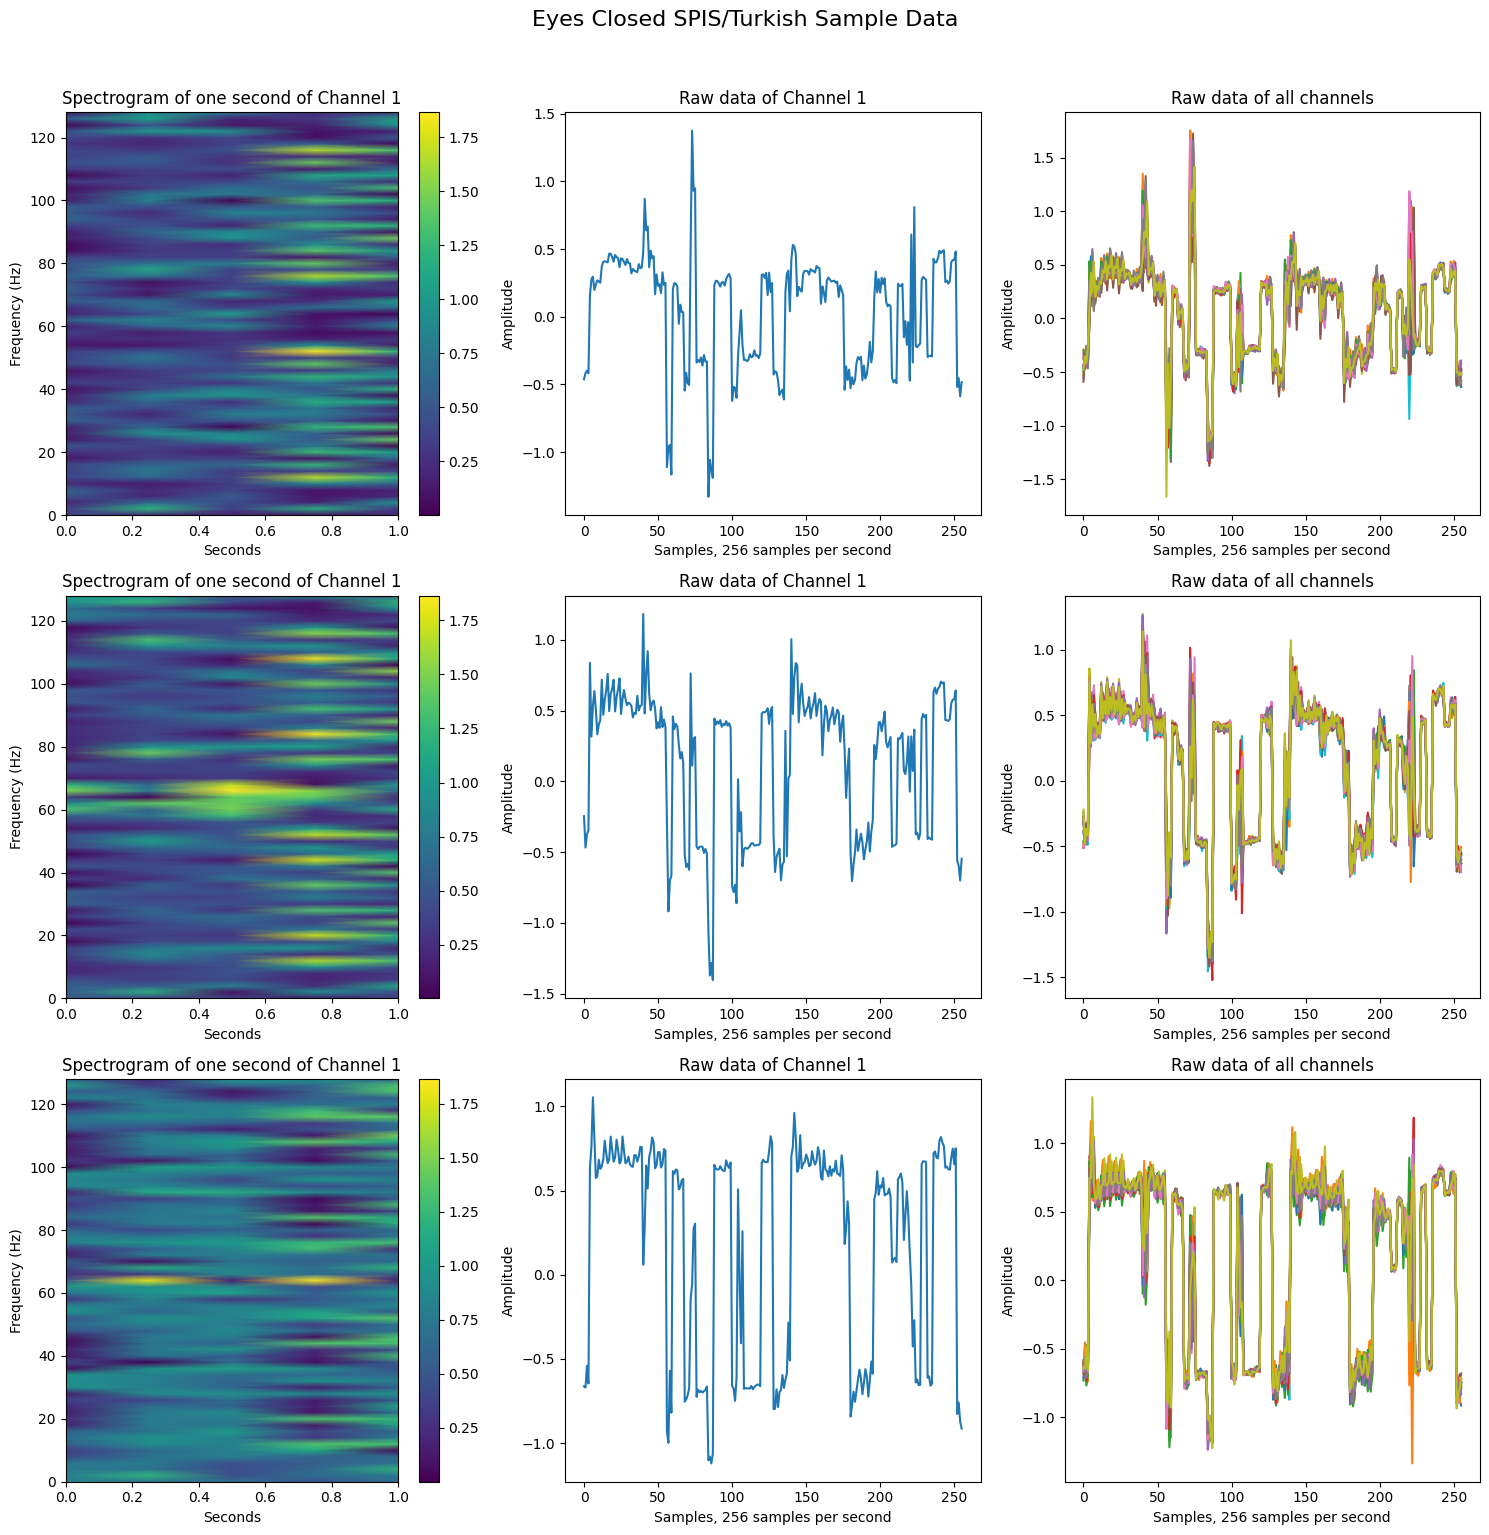

In [35]:
# make a 3x3 grid of subplots

second = 2400

times = np.array([0,0.25,0.5,0.75,1])
frequencies = np.arange(0, 130, 2)
spectrogram0 = np.abs(data_norm_stft.iloc[second,:6175//19].values).reshape(len(frequencies), len(times))
spectrogram1 = np.abs(data_norm_stft.iloc[second+15,:6175//19].values).reshape(len(frequencies), len(times))
spectrogram2 = np.abs(data_norm_stft.iloc[second+35,:6175//19].values).reshape(len(frequencies), len(times))

fig, axs = plt.subplots(3, 3, figsize=(15,15))
im0 = axs[0, 0].pcolormesh(times, frequencies, spectrogram0, shading='gouraud')
axs[0, 0].set_ylabel('Frequency (Hz)')
axs[0, 0].set_xlabel('Seconds')
axs[0, 0].set_title('Spectrogram of one second of Channel 1')
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].pcolormesh(times, frequencies, spectrogram1, shading='gouraud')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Seconds')
axs[1, 0].set_title('Spectrogram of one second of Channel 1')
fig.colorbar(im0, ax=axs[1, 0])

im2 = axs[2, 0].pcolormesh(times, frequencies, spectrogram2, shading='gouraud')
axs[2, 0].set_ylabel('Frequency (Hz)')
axs[2, 0].set_xlabel('Seconds')
axs[2, 0].set_title('Spectrogram of one second of Channel 1')
fig.colorbar(im0, ax=axs[2, 0])

axs[0, 1].plot(data_norm_raw.iloc[second,:].values.reshape(19,256)[0,:])
axs[0, 1].set_title('Raw data of Channel 1')
axs[0, 1].set_xlabel('Samples, 256 samples per second')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(data_norm_raw.iloc[second+15,:].values.reshape(19,256)[0,:])
axs[1, 1].set_title('Raw data of Channel 1')
axs[1, 1].set_xlabel('Samples, 256 samples per second')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].plot(data_norm_raw.iloc[second+35,:].values.reshape(19,256)[0,:])
axs[2, 1].set_title('Raw data of Channel 1')
axs[2, 1].set_xlabel('Samples, 256 samples per second')
axs[2, 1].set_ylabel('Amplitude')


axs[0, 2].plot(data_norm_raw.iloc[second,:].values.reshape(19,256).T)
axs[0, 2].set_title('Raw data of all channels')
axs[0, 2].set_xlabel('Samples, 256 samples per second')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(data_norm_raw.iloc[second+15,:].values.reshape(19,256).T)
axs[1, 2].set_title('Raw data of all channels')
axs[1, 2].set_xlabel('Samples, 256 samples per second')
axs[1, 2].set_ylabel('Amplitude')

axs[2, 2].plot(data_norm_raw.iloc[second+35,:].values.reshape(19,256).T)
axs[2, 2].set_title('Raw data of all channels')
axs[2, 2].set_xlabel('Samples, 256 samples per second')
axs[2, 2].set_ylabel('Amplitude')



# Make overall title for row 0 
plt.suptitle('Eyes Closed SPIS/Turkish Sample Data', y = 1.02, fontsize=16)
# tight layout
plt.tight_layout()
plt.show()

# Hospital plotting
## Eyes Closed

In [42]:
# Load in hospital data
dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked/"
hospital_data = np.load(f"{dir}df_EOandEC_norm_hospital.npy")
print(hospital_data.shape)

# Hospital spectrograms
hospital_spectrograms = pd.read_csv(f"{dir}hospital_spectrograms.csv")
print(hospital_spectrograms.shape)
hospital_spectrograms = hospital_spectrograms.iloc[:,:-2]

(3215, 19, 256)
(3215, 652)


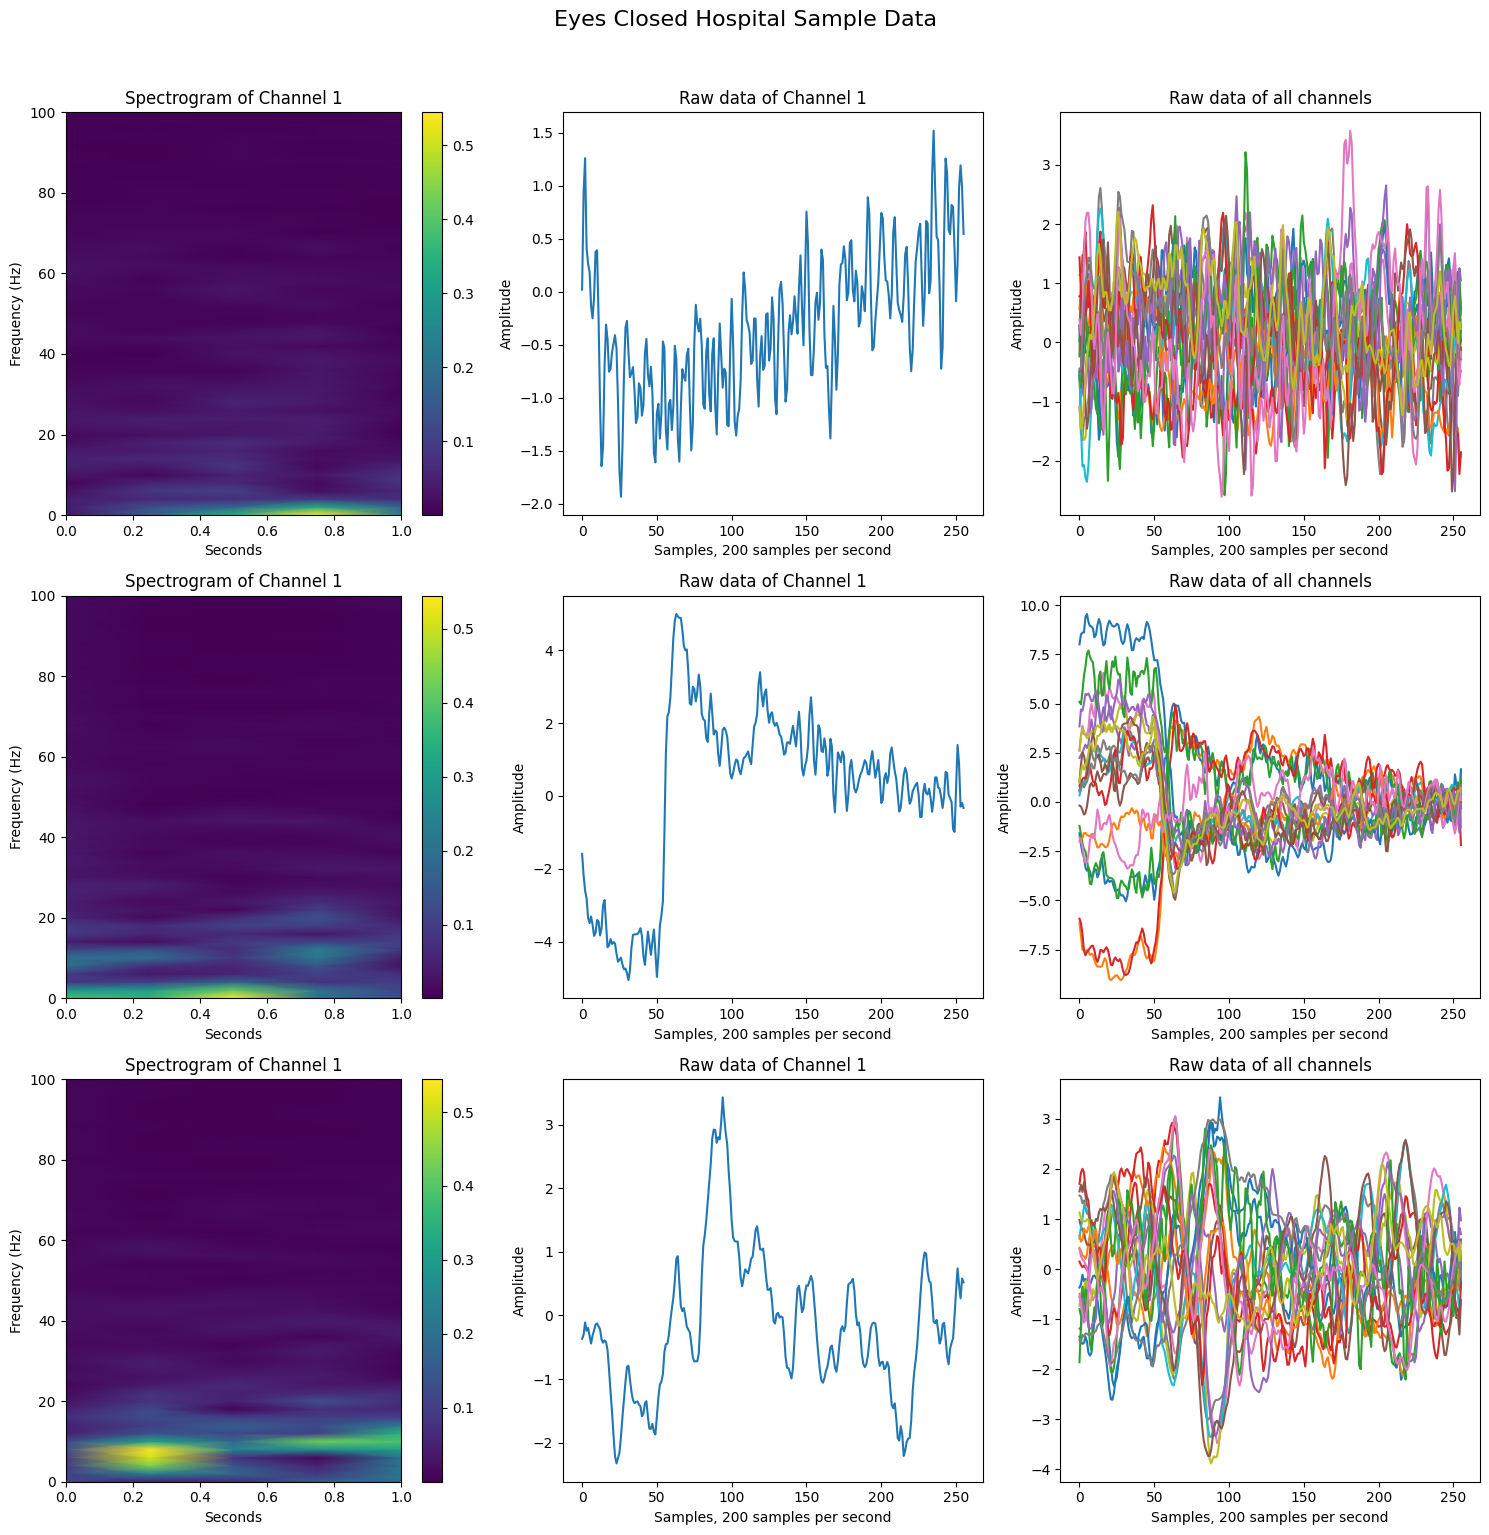

In [44]:
# make a 3x3 grid of subplots

second = 250

times = np.array([0,0.25,0.5,0.75,1])
frequencies = np.arange(0, 102, 2)
spectrogram0 = np.abs(hospital_spectrograms.iloc[second,:4845//19].values).reshape(len(frequencies), len(times))
spectrogram1 = np.abs(hospital_spectrograms.iloc[second+15,:4845//19].values).reshape(len(frequencies), len(times))
spectrogram2 = np.abs(hospital_spectrograms.iloc[second+35,:4845//19].values).reshape(len(frequencies), len(times))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
im0 = axs[0, 0].pcolormesh(times, frequencies, spectrogram0, shading='gouraud')
axs[0, 0].set_ylabel('Frequency (Hz)')
axs[0, 0].set_xlabel('Seconds')
axs[0, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].pcolormesh(times, frequencies, spectrogram1, shading='gouraud')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Seconds')
axs[1, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[1, 0])

im2 = axs[2, 0].pcolormesh(times, frequencies, spectrogram2, shading='gouraud')
axs[2, 0].set_ylabel('Frequency (Hz)')
axs[2, 0].set_xlabel('Seconds')
axs[2, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[2, 0])

axs[0, 1].plot(hospital_data[second,:].reshape(19,256)[0,:])
axs[0, 1].set_title('Raw data of Channel 1')
axs[0, 1].set_xlabel('Samples, 200 samples per second')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(hospital_data[second+15,:].reshape(19,256)[0,:])
axs[1, 1].set_title('Raw data of Channel 1')
axs[1, 1].set_xlabel('Samples, 200 samples per second')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].plot(hospital_data[second+35,:].reshape(19,256)[0,:])
axs[2, 1].set_title('Raw data of Channel 1')
axs[2, 1].set_xlabel('Samples, 200 samples per second')
axs[2, 1].set_ylabel('Amplitude')


axs[0, 2].plot(hospital_data[second,:].reshape(19,256).T)
axs[0, 2].set_title('Raw data of all channels')
axs[0, 2].set_xlabel('Samples, 200 samples per second')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(hospital_data[second+15,:].reshape(19,256).T)
axs[1, 2].set_title('Raw data of all channels')
axs[1, 2].set_xlabel('Samples, 200 samples per second')
axs[1, 2].set_ylabel('Amplitude')

axs[2, 2].plot(hospital_data[second+35,:].reshape(19,256).T)
axs[2, 2].set_title('Raw data of all channels')
axs[2, 2].set_xlabel('Samples, 200 samples per second')
axs[2, 2].set_ylabel('Amplitude')



# Make overall title for row 0 
plt.suptitle('Eyes Closed Hospital Sample Data', y = 1.02, fontsize=16)
# tight layout
plt.tight_layout()
plt.show()

# Eyes Open


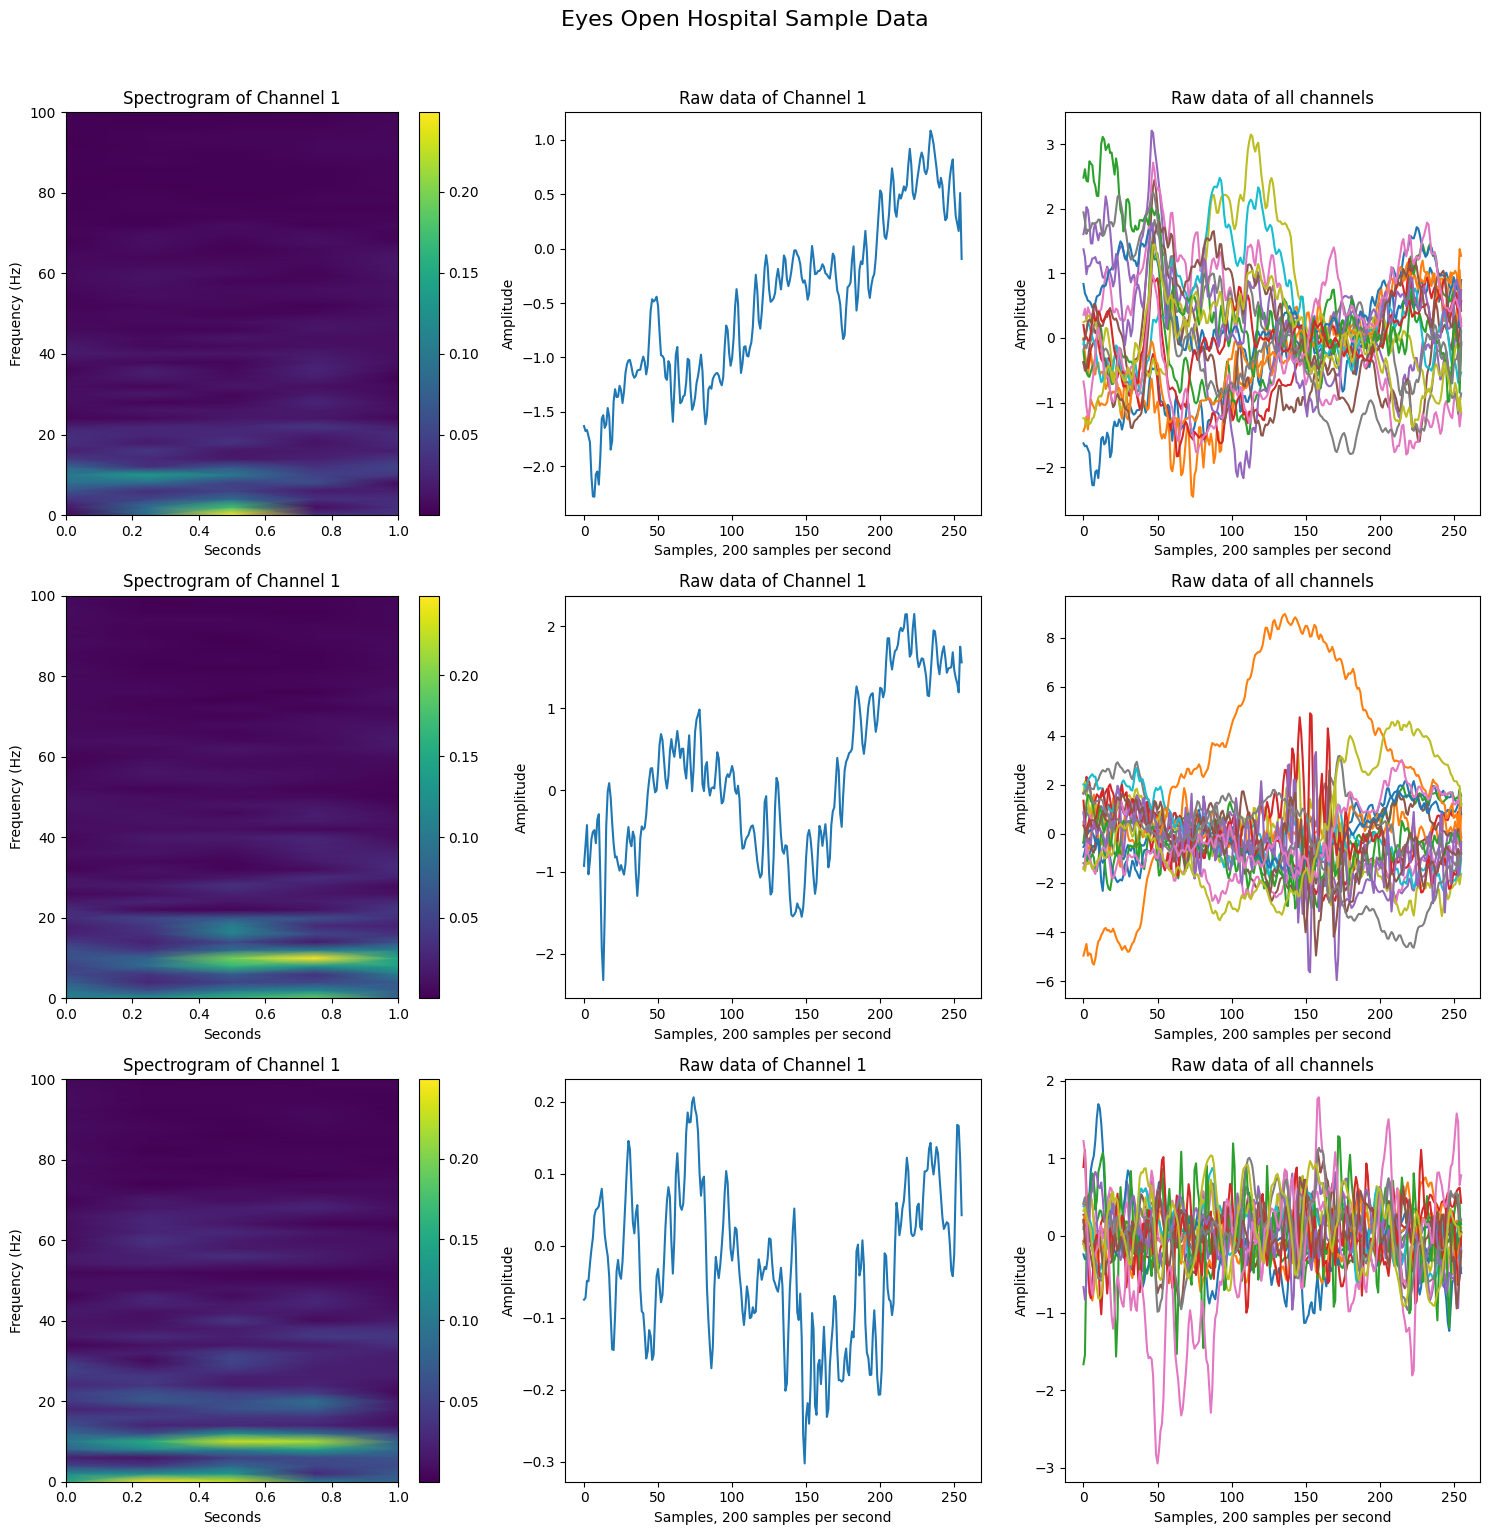

In [45]:
# make a 3x3 grid of subplots

second = 2000

times = np.array([0,0.25,0.5,0.75,1])
frequencies = np.arange(0, 102, 2)
spectrogram0 = np.abs(hospital_spectrograms.iloc[second,:4845//19].values).reshape(len(frequencies), len(times))
spectrogram1 = np.abs(hospital_spectrograms.iloc[second+15,:4845//19].values).reshape(len(frequencies), len(times))
spectrogram2 = np.abs(hospital_spectrograms.iloc[second+35,:4845//19].values).reshape(len(frequencies), len(times))

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
im0 = axs[0, 0].pcolormesh(times, frequencies, spectrogram0, shading='gouraud')
axs[0, 0].set_ylabel('Frequency (Hz)')
axs[0, 0].set_xlabel('Seconds')
axs[0, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[0, 0])

im1 = axs[1, 0].pcolormesh(times, frequencies, spectrogram1, shading='gouraud')
axs[1, 0].set_ylabel('Frequency (Hz)')
axs[1, 0].set_xlabel('Seconds')
axs[1, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[1, 0])

im2 = axs[2, 0].pcolormesh(times, frequencies, spectrogram2, shading='gouraud')
axs[2, 0].set_ylabel('Frequency (Hz)')
axs[2, 0].set_xlabel('Seconds')
axs[2, 0].set_title('Spectrogram of Channel 1')
fig.colorbar(im0, ax=axs[2, 0])

axs[0, 1].plot(hospital_data[second,:].reshape(19,256)[0,:])
axs[0, 1].set_title('Raw data of Channel 1')
axs[0, 1].set_xlabel('Samples, 200 samples per second')
axs[0, 1].set_ylabel('Amplitude')

axs[1, 1].plot(hospital_data[second+15,:].reshape(19,256)[0,:])
axs[1, 1].set_title('Raw data of Channel 1')
axs[1, 1].set_xlabel('Samples, 200 samples per second')
axs[1, 1].set_ylabel('Amplitude')

axs[2, 1].plot(hospital_data[second+35,:].reshape(19,256)[0,:])
axs[2, 1].set_title('Raw data of Channel 1')
axs[2, 1].set_xlabel('Samples, 200 samples per second')
axs[2, 1].set_ylabel('Amplitude')


axs[0, 2].plot(hospital_data[second,:].reshape(19,256).T)
axs[0, 2].set_title('Raw data of all channels')
axs[0, 2].set_xlabel('Samples, 200 samples per second')
axs[0, 2].set_ylabel('Amplitude')

axs[1, 2].plot(hospital_data[second+15,:].reshape(19,256).T)
axs[1, 2].set_title('Raw data of all channels')
axs[1, 2].set_xlabel('Samples, 200 samples per second')
axs[1, 2].set_ylabel('Amplitude')

axs[2, 2].plot(hospital_data[second+35,:].reshape(19,256).T)
axs[2, 2].set_title('Raw data of all channels')
axs[2, 2].set_xlabel('Samples, 200 samples per second')
axs[2, 2].set_ylabel('Amplitude')



# Make overall title for row 0 
plt.suptitle('Eyes Open Hospital Sample Data', y = 1.02, fontsize=16)
# tight layout
plt.tight_layout()
plt.show()

# Box plot of data

C:\Users\TMS-EEG\AppData\Local\Temp\ipykernel_6816\2655836781.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['LogReg T -> H','LogReg H -> H',  'KNN T -> H', 'KNN H -> H','EEGNet T -> H' ,'EEGNet T -> T', 'SleepTransformer T -> T'], rotation=25)


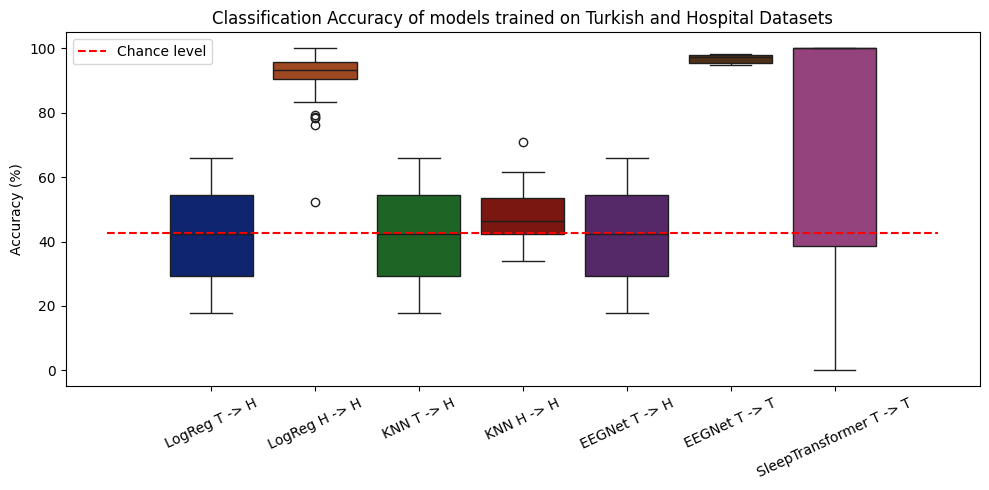

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

turk_logreg_channelwise_standard = np.array([100.00,100.00,95.97,99.33,93.29,93.96,86.24,92.28,98.66,91.61])
turk_logreg_channelwise_MinMax = np.array([98.99,100.00,82.21,100.00,95.64,92.28,82.55,82.89,94.97,58.39])
hospital_from_turkish_logreg_standard = np.array([41.75,65.91,24.05,62.50,21.05,17.81,42.31,58.90,41.18,22.08,44.44,34.07,26.83,41.75,45.45,21.05,27.71,59.18,52.38,61.54,42.86,36.17,45.45,29.41,55.56,51.22,54.55,64.07,30.23])
hospital_from_turkish_logreg_standard_o1o2 = np.array([27.18, 57.95, 73.42, 57.50, 47.37, 58.90, 47.12, 43.15, 29.41, 44.16, 58.33, 51.65, 68.29, 38.83, 47.27, 27.63, 30.12, 45.58, 60.32, 55.13, 39.05, 43.62, 38.18, 31.76, 20.74, 18.70, 40.15, 16.77, 33.72])
hospital_logreg_standard = np.array([78.64,78.41,100.00,93.12,97.37,79.45,100.00,95.89,100.00,92.21,83.33,93.41,93.90,94.17,93.64,93.42,95.18,52.38,91.27,94.87,96.19,90.43,76.36,96.47,96.30,95.93,92.42,92.81,89.53,90.59])
turk_knn_standard = np.array([81.54,80.20,70.81,94.63,83.56,80.20,63.76,35.91,91.95,10.40])
turk_knn_MinMax = np.array([66.78,95.64,66.78,69.13,87.92,92.28,73.83,17.79,58.39,88.93])
hospital_from_turkish_knn_standard = np.array([41.75,65.91,24.05,62.50,21.05,17.81,42.31,58.90,41.18,22.08,44.44,34.07,26.83,41.75,45.45,21.05,27.71,59.18,52.38,61.54,42.86,36.17,45.45,29.41,55.56,51.22,54.55,64.07,30.23])
hospital_knn = np.array([57.28,
52.27,
70.89,
56.25,
56.58,
61.64,
45.19,
43.15,
34.31,
35.06,
48.15,
53.85,
56.10,
34.95,
52.73,
51.32,
43.37,
36.05,
45.24,
48.72,
42.86,
37.23,
54.55,
42.35,
52.59,
43.90,
34.09,
34.73,
45.35,47.27])
hospital_from_turkish_eegnet = np.array([41.75,65.91,24.05,62.50,21.05,17.81,42.31,58.90,41.18,22.08,44.44,34.07,26.83,41.75,45.45,21.05,27.71,59.18,52.38,61.54,42.86,36.17,45.45,29.41,55.56,51.22,54.55,64.07,30.23])
turk_eeg_net = np.array([97.98657718120805,98.32214765100672,97.98657718120805,94.96644295302013,96.64429530201342,94.96644295302013,96.64429530201342,94.96644295302013,97.98657718120805,97.98657718120805])
turk_transformer = np.array([100,100,100,100,100,100,32,0,0,58])

# make vertical boxplot with Seaborn in one plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[hospital_from_turkish_logreg_standard, hospital_logreg_standard, hospital_from_turkish_knn_standard, hospital_knn, hospital_from_turkish_eegnet ,turk_eeg_net, turk_transformer], ax=ax, palette='dark')
ax.set_xticklabels(['LogReg T -> H','LogReg H -> H',  'KNN T -> H', 'KNN H -> H','EEGNet T -> H' ,'EEGNet T -> T', 'SleepTransformer T -> T'], rotation=25)
ax.set_ylabel('Accuracy (%)')
ax.set_title('Classification Accuracy of models trained on Turkish and Hospital Datasets')
ax.hlines(42.5, -1, 7, colors='r', linestyles='dashed', label='Chance level')
plt.legend()
plt.tight_layout()
plt.show()




# Turkish plot

mean of eeg net turkish: 96.84563758389262


C:\Users\TMS-EEG\AppData\Local\Temp\ipykernel_5284\1042374559.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['LogReg', 'KNN','EEGNet' ,'SleepTransformer'])


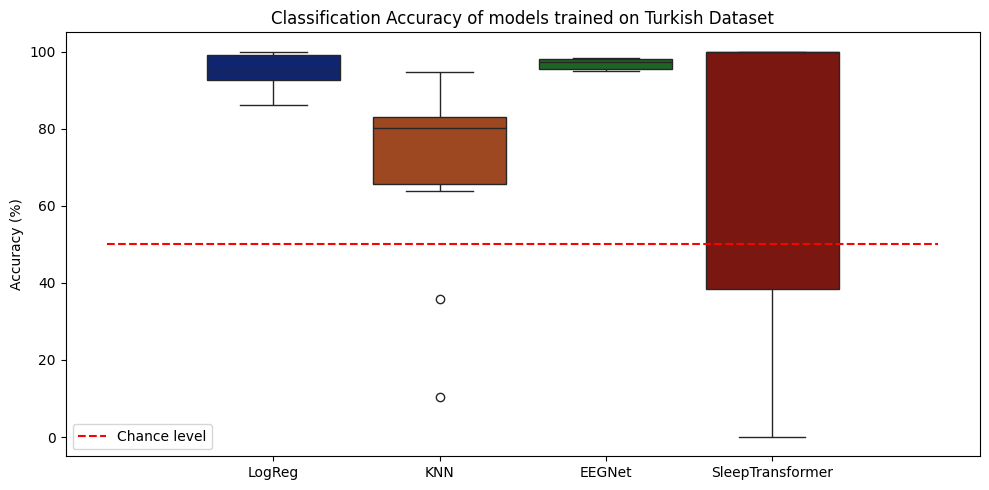

mean of log reg channelwise standard: 95.13399999999999


In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

turk_logreg_channelwise_standard = np.array([100.00,100.00,95.97,99.33,93.29,93.96,86.24,92.28,98.66,91.61])
turk_knn_standard = np.array([81.54,80.20,70.81,94.63,83.56,80.20,63.76,35.91,91.95,10.40])
turk_eeg_net = np.array([97.98657718120805,98.32214765100672,97.98657718120805,94.96644295302013,96.64429530201342,94.96644295302013,96.64429530201342,94.96644295302013,97.98657718120805,97.98657718120805])
turk_transformer = np.array([100,100,100,100,100,100,32,0,0,58])

print(f"mean of eeg net turkish: {np.mean(turk_eeg_net)}")

# make vertical boxplot with Seaborn in one plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[turk_logreg_channelwise_standard, turk_knn_standard, turk_eeg_net, turk_transformer], ax=ax, palette='dark')
ax.set_xticklabels(['LogReg', 'KNN','EEGNet' ,'SleepTransformer'])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Classification Accuracy of models trained on Turkish Dataset')
ax.hlines(50, -1,4, colors='r', linestyles='dashed', label='Chance level')
plt.legend()
plt.tight_layout()
plt.show()

print(f"mean of log reg channelwise standard: {np.mean(turk_logreg_channelwise_standard)}")



# hospital plots

hospitl eegnet mean: 73.73316490413794


C:\Users\TMS-EEG\AppData\Local\Temp\ipykernel_5284\604049164.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['LogReg', 'KNN', 'EEGNet'])


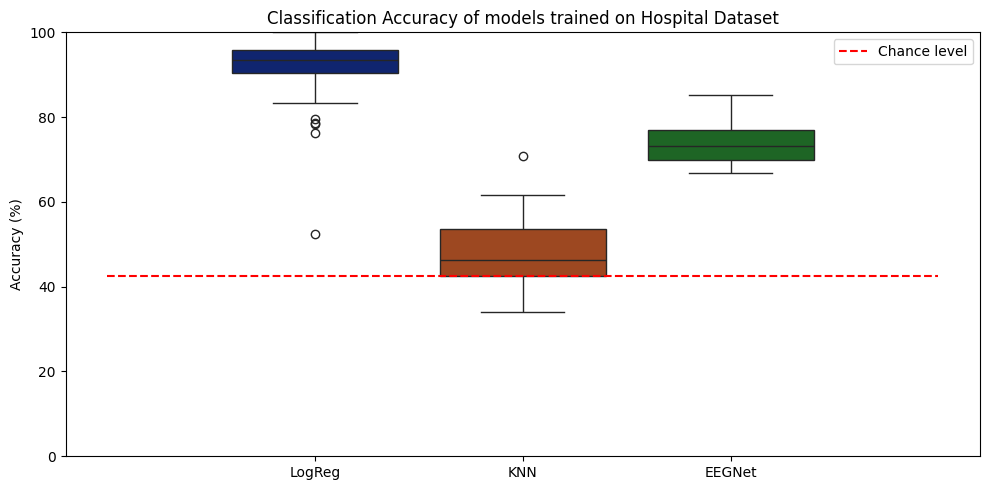

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hospital_logreg_standard = np.array([78.64,78.41,100.00,93.12,97.37,79.45,100.00,95.89,100.00,92.21,83.33,93.41,93.90,94.17,93.64,93.42,95.18,52.38,91.27,94.87,96.19,90.43,76.36,96.47,96.30,95.93,92.42,92.81,89.53,90.59])
hospital_knn = np.array([57.28,
52.27,
70.89,
56.25,
56.58,
61.64,
45.19,
43.15,
34.31,
35.06,
48.15,
53.85,
56.10,
34.95,
52.73,
51.32,
43.37,
36.05,
45.24,
48.72,
42.86,
37.23,
54.55,
42.35,
52.59,
43.90,
34.09,
34.73,
45.35,47.27])
hospital_eegnet = np.array([67.70310218, 68.93363739, 77.38753831, 76.3089248, 74.9188073, 67.70346547,
 79.29886799, 79.40279673, 69.95460429, 77.03064399, 76.66904315, 79.8417178,
 77.44382265, 68.34110961, 68.56141184, 69.85866121, 70.58934634, 80.04686543,
 74.06885119, 72.09179606, 71.14857924, 66.85361453, 69.13346218, 75.58992646,
 85.17261162, 73.13063663, 72.60821575, 72.59444395, 75.87527813])

print(f"hospitl eegnet mean: {np.mean(hospital_eegnet)}")

# make vertical boxplot with Seaborn in one plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[hospital_logreg_standard, hospital_knn, hospital_eegnet], ax=ax, palette='dark')
ax.set_xticklabels(['LogReg', 'KNN', 'EEGNet'])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Classification Accuracy of models trained on Hospital Dataset')
ax.hlines(42.5, -1, 3, colors='r', linestyles='dashed', label='Chance level')
#make y axis start at 0
ax.set_ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()




# T -> H plot

C:\Users\TMS-EEG\AppData\Local\Temp\ipykernel_5284\2854636420.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['LogReg',  'KNN','EEGNet' ])


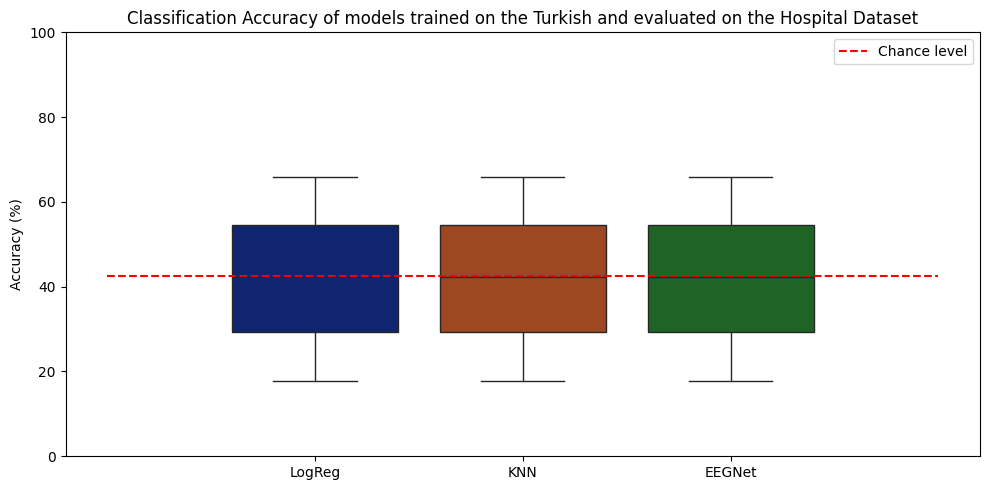

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

hospital_from_turkish_logreg_standard = np.array([41.75,65.91,24.05,62.50,21.05,17.81,42.31,58.90,41.18,22.08,44.44,34.07,26.83,41.75,45.45,21.05,27.71,59.18,52.38,61.54,42.86,36.17,45.45,29.41,55.56,51.22,54.55,64.07,30.23])
hospital_from_turkish_knn_standard = np.array([41.75,65.91,24.05,62.50,21.05,17.81,42.31,58.90,41.18,22.08,44.44,34.07,26.83,41.75,45.45,21.05,27.71,59.18,52.38,61.54,42.86,36.17,45.45,29.41,55.56,51.22,54.55,64.07,30.23])
hospital_from_turkish_eegnet = np.array([41.75,65.91,24.05,62.50,21.05,17.81,42.31,58.90,41.18,22.08,44.44,34.07,26.83,41.75,45.45,21.05,27.71,59.18,52.38,61.54,42.86,36.17,45.45,29.41,55.56,51.22,54.55,64.07,30.23])


# make vertical boxplot with Seaborn in one plot
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(data=[hospital_from_turkish_logreg_standard, hospital_from_turkish_knn_standard, hospital_from_turkish_eegnet], ax=ax, palette='dark')
ax.set_xticklabels(['LogReg',  'KNN','EEGNet' ])
ax.set_ylabel('Accuracy (%)')
ax.set_title('Classification Accuracy of models trained on the Turkish and evaluated on the Hospital Dataset')
ax.hlines(42.5, -1, 3, colors='r', linestyles='dashed', label='Chance level')
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()




# fancy model labelling plot

In [69]:
# load in df_EOandEC_norm_hospital.npy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dir = "E:/ChristianMusaeus/Data/Turkish/"
data = np.load(f"{dir}scaled_rawEEG_epochs.npy")
print(data.shape)

# switch to channels last
data = np.moveaxis(data, 1, -1)
print(data.shape)


(2980, 256, 19)
(2980, 19, 256)


In [78]:
# load in df_EOandEC_norm_hospital.npy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked/"
data = np.load(f"{dir}df_EOandEC_norm_hospital.npy")
print(data.shape)



(3215, 19, 256)


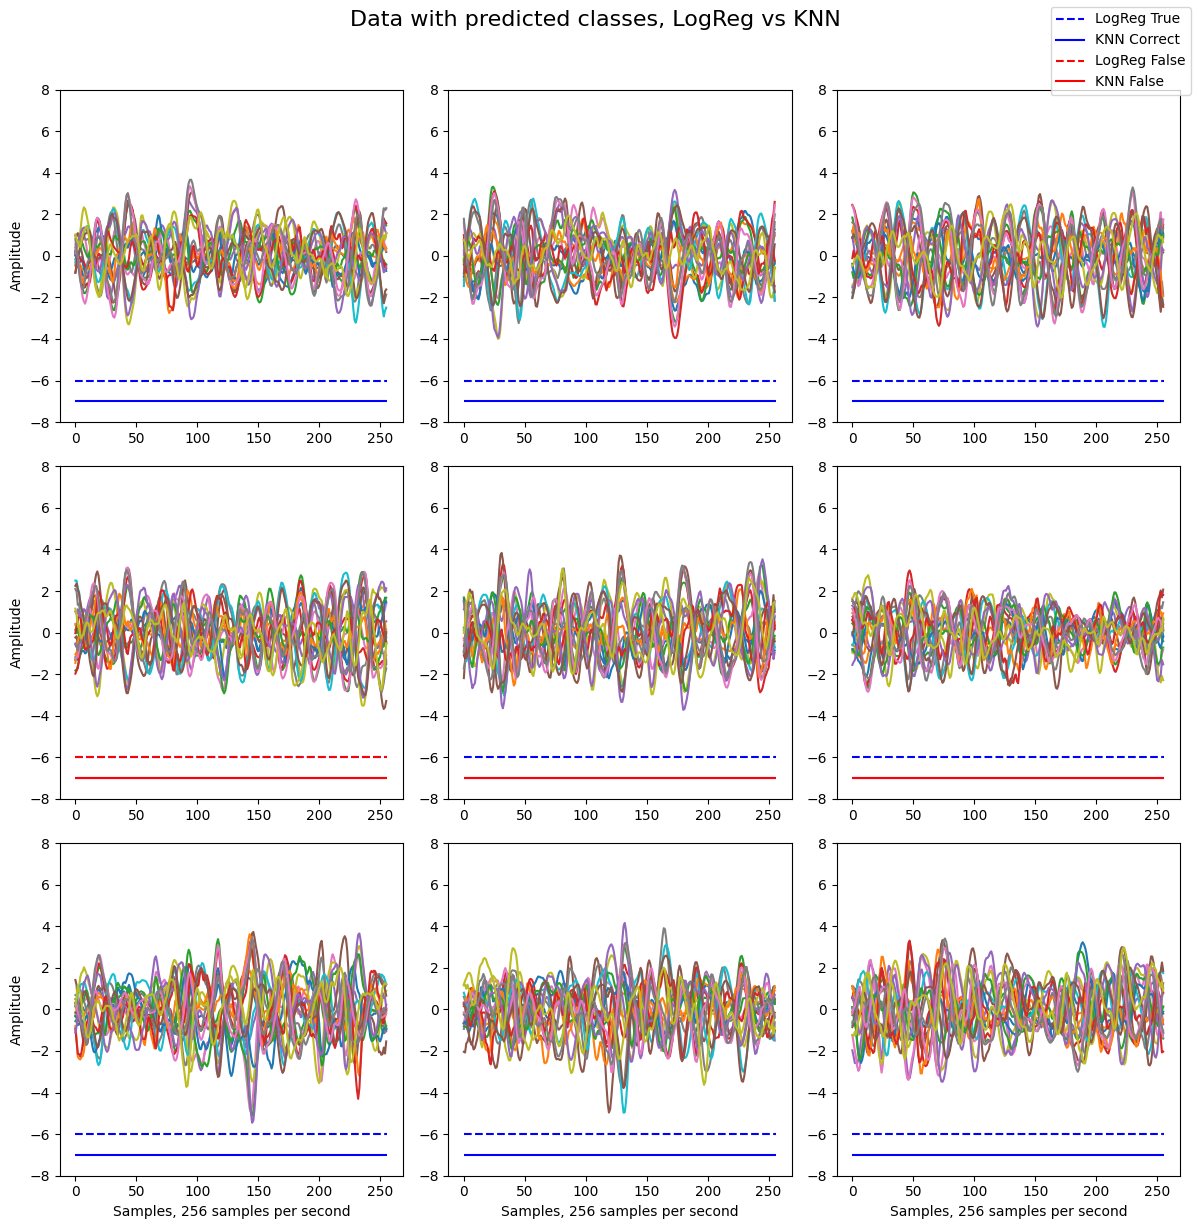

In [100]:

# plot 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(12,12))
for i in range(3):
    for j in range(3):
        axs[i, j].plot(data[j+i*5,:].T)
        axs[i, j].hlines(-6, 0, 256, colors='b', linestyles='dashed')
        axs[i, j].hlines(-7, 0, 256, colors='b')
        # make room in the plots for a colored line with the class
        axs[i, j].set_ylim(-8, 8)
        
axs[1,0].hlines(-6, 0, 256, colors='r', linestyles='dashed')
axs[1,0].hlines(-7, 0, 256, colors='r')
axs[1,1].hlines(-7, 0, 256, colors='r')
axs[1,2].hlines(-7, 0, 256, colors='r')

axs[2,0].set_xlabel('Samples, 256 samples per second')
axs[2,0].set_ylabel('Amplitude')
axs[2,1].set_xlabel('Samples, 256 samples per second')
axs[2,2].set_xlabel('Samples, 256 samples per second')
axs[0,0].set_ylabel('Amplitude')
axs[1,0].set_ylabel('Amplitude')

# make custom legend with a dashed line and a solid line
import matplotlib.lines as mlines
blue_dashed_line = mlines.Line2D([], [], color='blue', linestyle='dashed', label='LogReg True')
blue_solid_line = mlines.Line2D([], [], color='blue', linestyle='solid', label='KNN Correct')
red_dashed_line = mlines.Line2D([], [], color='red', linestyle='dashed', label='LogReg False')
red_solid_line = mlines.Line2D([], [], color='red', linestyle='solid', label='KNN False')
plt.figlegend(handles=[blue_dashed_line, blue_solid_line, red_dashed_line, red_solid_line], loc='upper right')


# plt.figlegend(['LogReg', 'KNN'], loc='upper right')
# Make overall title for row 0
plt.suptitle('Data with predicted classes, LogReg vs KNN', y = 1.02, fontsize=16)            
plt.tight_layout()
plt.show()

In [77]:
# load in preds 
dir = "E:/ChristianMusaeus/Data/Eyes_closed_marked/"
logregpreds = np.load(f"{dir}hospital_preds.npy")
knnpreds = np.load(f"{dir}knn_Standard_hospital_preds.npy")


diffs = logregpreds - knnpreds
print(f"where different: {np.where(diffs != 0)}")
print(f"number of different predictions: {np.sum(diffs != 0)}")


where different: (array([   0,    1,    2, ..., 3211, 3213, 3214], dtype=int64),)
number of different predictions: 1400
